In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

DATA_PATH="../data/sz_taxi_202006/"

%pwd

'/home/cseadmin/dz/TrafficFlowModel/model'

bin

---

In [2]:
traj_list=np.load("../data/sz_taxi_202006/sz_taxi_202006_traj_list.npy", allow_pickle=True)

len(traj_list)
traj_list[0]

1751602

[[198, Timestamp('2020-06-01 00:43:29'), 56.0],
 [199, Timestamp('2020-06-01 00:43:49'), 55.5],
 [448, Timestamp('2020-06-01 00:44:09'), 55.0]]

In [3]:
traj_list_bin_24=[[] for _ in range(24)]

for traj in traj_list:
    traj_list_bin_24[traj[0][1].hour].append(traj)
    
list(map(len, traj_list_bin_24))

[88134,
 79532,
 62254,
 47490,
 35925,
 32507,
 44365,
 81156,
 103175,
 102504,
 100915,
 95067,
 78162,
 81304,
 93555,
 89696,
 76454,
 72476,
 85763,
 86100,
 76114,
 64580,
 47119,
 27255]

In [6]:
np.save("../data/sz_taxi_202006/sz_taxi_202006_traj_list_bin_24.npy", traj_list_bin_24, allow_pickle=True)

/home/cseadmin/dz/anaconda3/envs/torch1.11/lib/python3.8/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


sample

---

In [2]:
traj_list_bin_24=np.load("../data/sz_taxi_202006/sz_taxi_202006_traj_list_bin_24.npy", allow_pickle=True)

list(map(len, traj_list_bin_24))
sum(list(map(len, traj_list_bin_24)))

[88134,
 79532,
 62254,
 47490,
 35925,
 32507,
 44365,
 81156,
 103175,
 102504,
 100915,
 95067,
 78162,
 81304,
 93555,
 89696,
 76454,
 72476,
 85763,
 86100,
 76114,
 64580,
 47119,
 27255]

1751602

In [3]:
traj_list_bin_24_seqlen=[[] for _ in range(24)]

seq_len=5
for i in range(len(traj_list_bin_24)):
    for traj in traj_list_bin_24[i]:
        if len(traj)>=seq_len+1:
            traj_list_bin_24_seqlen[i].append(traj)
    
list(map(len, traj_list_bin_24_seqlen))
sum(list(map(len, traj_list_bin_24_seqlen)))

[64383,
 57880,
 46043,
 35490,
 26735,
 23549,
 29543,
 58320,
 84280,
 81301,
 78094,
 74879,
 61190,
 64620,
 74534,
 70934,
 60549,
 57903,
 68221,
 68197,
 59359,
 49862,
 35746,
 20088]

1351700

In [6]:
p=0.05
traj_list_bin_24_sampled=list(map(lambda bin: np.random.choice(bin, size=int(p*len(bin)), replace=False), traj_list_bin_24_seqlen))

list(map(len, traj_list_bin_24_sampled))
sum(list(map(len, traj_list_bin_24_sampled)))
sum(list(map(len, traj_list_bin_24_sampled)))/sum(list(map(len, traj_list_bin_24_seqlen)))

/tmp/ipykernel_52285/3078606262.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  traj_list_bin_24_sampled=list(map(lambda bin: np.random.choice(bin, size=int(p*len(bin)), replace=False), traj_list_bin_24_seqlen))


[3219,
 2894,
 2302,
 1774,
 1336,
 1177,
 1477,
 2916,
 4214,
 4065,
 3904,
 3743,
 3059,
 3231,
 3726,
 3546,
 3027,
 2895,
 3411,
 3409,
 2967,
 2493,
 1787,
 1004]

67576

0.0499933417178368

In [7]:
np.save(f"../data/sz_taxi_202006/sz_taxi_202006_traj_list_bin_24_sampled_{p}.npy", traj_list_bin_24_sampled, allow_pickle=True)

to road_id list

---

In [11]:
p=0.1
traj_list_bin_24_sampled=np.load(f"../data/sz_taxi_202006/sz_taxi_202006_traj_list_bin_24_sampled_{p}.npy", allow_pickle=True)

sum(list(map(len, traj_list_bin_24_sampled)))

135161

(array([6.9326e+04, 4.9166e+04, 3.9382e+04, 2.3159e+04, 2.4327e+04,
        1.8026e+04, 1.2843e+04, 7.1250e+03, 7.1710e+03, 5.1250e+03,
        3.6830e+03, 2.1900e+03, 2.1740e+03, 1.5990e+03, 1.2500e+03,
        6.6400e+02, 7.1300e+02, 5.6100e+02, 4.2700e+02, 2.7100e+02,
        2.6100e+02, 1.9200e+02, 1.6200e+02, 9.9000e+01, 1.0600e+02,
        7.9000e+01, 5.0000e+01, 4.1000e+01, 3.4000e+01, 2.9000e+01,
        1.1000e+01, 1.8000e+01, 1.8000e+01, 1.0000e+01, 9.0000e+00,
        5.0000e+00, 3.0000e+00, 5.0000e+00, 3.0000e+00, 3.0000e+00,
        2.0000e+00, 2.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  6.  ,   9.74,  13.48,  17.22,  20.96,  24.7 ,  28.44,  32.18,
         35.92,  39.66,  43.4 ,  47.14,  50.88,  54.62,  58.36,  62.1 ,
         65.84,  69.58,  73.32,  77.06,  80.8 ,  84.54,  88.28,  92.02,
         95.76,  99.5 , 103.24, 106.98, 110.72, 114.46, 118.2 , 121.94,
        125.68, 129.42, 133.16

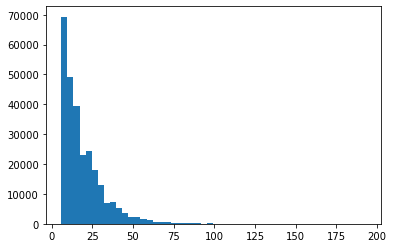

In [ ]:
len_list=[]
for bin in traj_list_bin_24_sampled:
    for traj in bin:
        len_list.append(len(traj))
    
len_list=np.array(len_list)
plt.hist(len_list, bins=50)
plt.show()

In [12]:
traj_list_all=[]

for bin in traj_list_bin_24_sampled:
    for traj in bin:
        road_ids=[]
        for point in traj:
            road_ids.append(point[0])
        traj_list_all.append(road_ids)

len(traj_list_all)

135161

In [13]:
np.save(f"../data/sz_taxi_202006/sz_taxi_202006_traj_list_bin_24_sampled_{p}_flatten_id.npy", traj_list_all)

/home/cseadmin/dz/anaconda3/envs/torch1.11/lib/python3.8/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)
